1. Dates:
● GitHub Repository with the Report due at 5 PM on Thursday, March 30th

● In-Person Presentation on Saturday, April 1st at 11 AM

● Attend Data Science Week events to earn bonus points. Each team/participant can
receive up to 10 bonus points and you can find information about location and
times on our instagram @gwu_dsa

○ Trivia Night (March 27, 2023): +2 points

○ Data Science Working Session (March 28, 2023): +3 points

■ Please Read: This time is provided for you to meet with your
group as well as asking questions about setup/deliverables. We
encourage you to come to this working session because we will
have a professor there to assist you.

○ Game Night & Networking (March 29, 2023): +3 points

○ DSA Logo Competition (March 30, 2023): +2 points

○ Guest Speaker Event (March 31, 2023): +5 points

2. Data:

You can access the dataset for Datathon at this link

3. Problem Statement:
● We are interested in identifying, understanding, and predicting the drinkability of
water based on its features. Your task is:

○ To identify pattern, and show how different water qualities may be related

○ Build a model that predicts drinkability of water when the qualities change

● Please cite any additional research done to support your conclusion

4. Report:
The report, in the form of Jupyter notebook or Google Collab, should include the
following sections:

● Abstract: Summarize the key findings

● Pipeline: Implement the full pipeline of the project, including:

○ Data cleaning/preprocessing

○ EDA

○ Hyperparameter tuning and / or model selection

○ Interpretation: e. g., feature’s predictive power over the target

○ Discussion/ Conclusion

5. Presentation:
● Prepare a 5-10 minute long presentation, which should include a focus on the
interpretation and a discussion of the report

● PowerPoint Presentation

○ The slides can include data cleaning and preprocessing steps, feature
engineering, EDA, and modeling, etc.

○ Highlight any interesting patterns and insights

○ Explain why you chose the model and the steps you took to increasing its
performance

○ Make sure to not exeed the time limit

6. Deliverables:

● Each team should submit a Jupyter notebook or Google Collab file and include:

○ The GitHub Repo link of the report

○ Submission should be emailed to arugupta17@gwu.edu by 5 PM on
Thursday, March 30th

7. Judging Criteria:

○ On top of evaluating the GitHub Repository organization and the in-person
presentation the rubric below is also how the judges will evaluate each team/
participant:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,roc_curve, roc_auc_score
sns.set()

In [42]:
df=pd.read_csv("water_potability.csv")

In [43]:
df.shape

(3276, 10)

In [5]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [6]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [7]:
df.isnull().sum()/df.shape[0]*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

<AxesSubplot:>

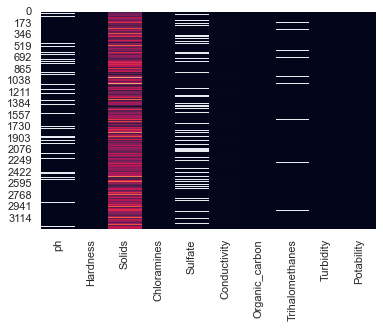

In [8]:
sns.heatmap(df,cbar=False)

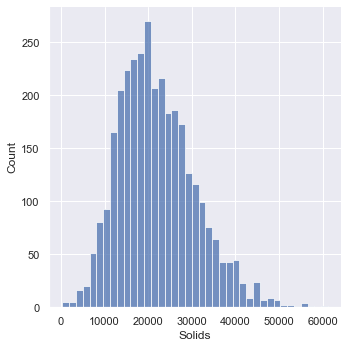

In [9]:
sns.displot(df["Solids"])

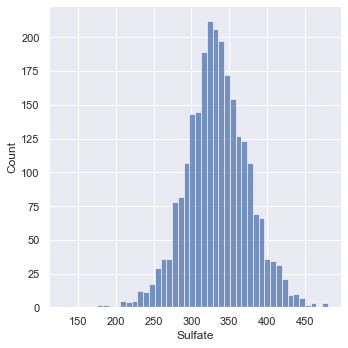

In [10]:
sns.displot(df["Sulfate"])

In [11]:
from pandas_profiling import ProfileReport


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [12]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

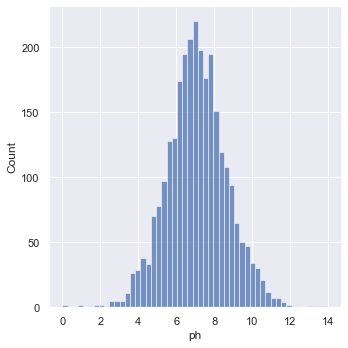

In [14]:
sns.displot(df["ph"])

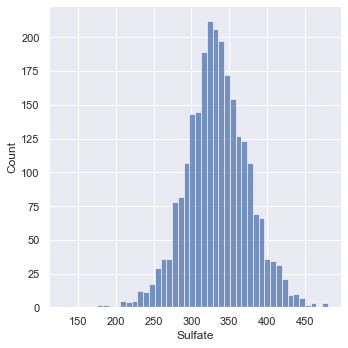

In [15]:
sns.displot(df["Sulfate"])

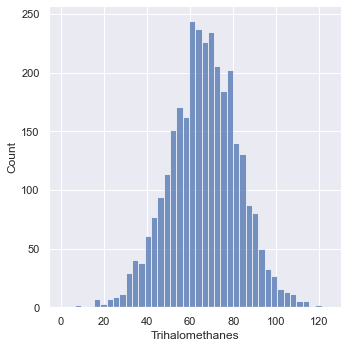

In [16]:
sns.displot(df["Trihalomethanes"])

In [17]:
x= df.drop(columns=["Potability"])
y=df["Potability"]

In [18]:
x.head(2)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0      NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.71608  129.422921  18630.057858     6.635246         NaN    592.885359   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656

In [19]:
y.head(2)

0    0
1    0
Name: Potability, dtype: int64

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.20, random_state = 355)# training & testing 


In [21]:
## imputatio

In [22]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(x_train)

SimpleImputer()

In [23]:
x_imtrain = imp_mean.transform(x_train)
x_imtest = imp_mean.transform(x_test)

In [51]:
import pickle as pk
pk.dump( x_imtrain, open( r"Imputated_data\x_imtrain.pk", "wb" ) )
pk.dump( x_imtest, open( r"Imputated_data\x_imtest.pk", "wb" ) )

pk.dump( y_train, open( r"Imputated_data\y_train.pk", "wb" ) )
pk.dump( y_test, open( r"Imputated_data\y_test.pk", "wb" ) )

In [24]:
def evaluate_model(model,x_train,y_train,x_test,y_test,fit=False):
    '''
    Model Evaluation for Classifier
    :param  model : model object 
    :param x_train: Train features
    :param y_train: Train Target 
    :param x_test: Test features
    :param y_test: Test Target 
    :param fit bool : True if model is already fited else false
    :return: Train and Test Classification report and AUC- ROC Graph
    '''
    if fit == False:
        model.fit(x_train,y_train)
        
    
    train_pred=model.predict(x_train)
    print("Training report")
    print(classification_report(y_train, train_pred))
    
    print("Testing report")
    test_pred=model.predict(x_test)    
    print(classification_report(y_test, test_pred))

    y_pred_prob=model.predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    auc=roc_auc_score(y_test,y_pred_prob[:,1])
    print("AUC Score")
    print(auc)
    
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    

Training report
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1605
           1       1.00      0.00      0.00      1015

    accuracy                           0.61      2620
   macro avg       0.81      0.50      0.38      2620
weighted avg       0.76      0.61      0.47      2620

Testing report
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       393
           1       0.00      0.00      0.00       263

    accuracy                           0.60       656
   macro avg       0.30      0.50      0.37       656
weighted avg       0.36      0.60      0.45       656

AUC Score
0.5058678973287281


C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


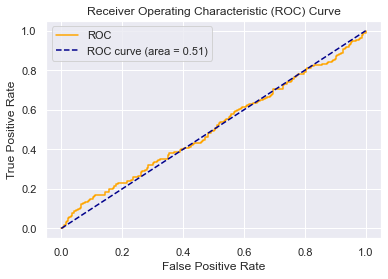

In [25]:
log_reg = LogisticRegression()
evaluate_model(log_reg,x_imtrain,y_train,x_imtest,y_test,fit=False)

Training report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1605
           1       1.00      0.99      0.99      1015

    accuracy                           0.99      2620
   macro avg       1.00      0.99      0.99      2620
weighted avg       0.99      0.99      0.99      2620

Testing report
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       393
           1       0.55      0.40      0.46       263

    accuracy                           0.63       656
   macro avg       0.61      0.59      0.59       656
weighted avg       0.62      0.63      0.61       656

AUC Score
0.632030108650432


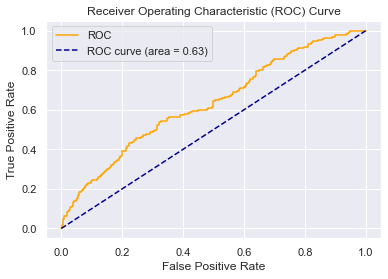

In [26]:
xgb= XGBClassifier(objective='binary:logistic')
evaluate_model(xgb,x_imtrain,y_train,x_imtest,y_test,fit=False)

Training report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1605
           1       1.00      0.99      1.00      1015

    accuracy                           1.00      2620
   macro avg       1.00      1.00      1.00      2620
weighted avg       1.00      1.00      1.00      2620

Testing report
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       393
           1       0.55      0.41      0.47       263

    accuracy                           0.63       656
   macro avg       0.60      0.59      0.59       656
weighted avg       0.62      0.63      0.61       656

AUC Score
0.6503545893439371


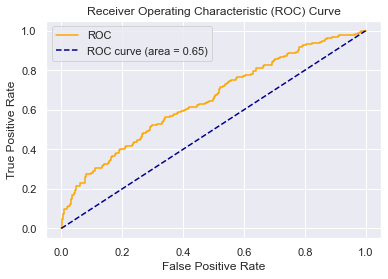

In [27]:
xgb= XGBClassifier(objective='binary:logistic')
evaluate_model(xgb,x_train,y_train,x_test,y_test,fit=False)

In [28]:
x_train

ph    Hardness        Solids  Chloramines     Sulfate  \
447   9.112786  205.941072  20868.627979     6.962790  330.934290   
2587  5.708517  187.081758  12193.611261     8.288505  351.573257   
2655  3.422394  141.300305  16017.611896     8.214714         NaN   
166        NaN  170.099236  39906.190271     6.554996         NaN   
917   7.592672  177.080839  14912.225506     6.041144  349.240614   
...        ...         ...           ...          ...         ...   
1966  6.866357  185.631487  13979.381750     7.043425  375.434032   
2303  8.111101  198.768195  35200.798834     9.685390         NaN   
2099  3.717704  183.349431  14841.241996     9.534970         NaN   
2690  8.332953  236.532404  18881.795178     4.275693         NaN   
2814       NaN  256.936378  13766.330789     5.083866  290.311034   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
447     422.039495       16.128976        77.796530   4.567088  
2587    577.402810       14.357648              NaN   3.344285  
2655    580.870759       10.603280        94.949108   3.676246  
166     515.386742       13.516078        40.514172   4.353239  
917     355.284442       17.161966        42.115257   3.341427  
...            ...             ...              ...        ...  
1966    462.535115       17.194992        74.557790   4.346154  
2303    348.971395       19.071935        72.871564   3.663775  
2099    293.917599       12.942291       112.061027   3.780259  
2690    384.729162       15.121055        55.507739   3.408300  
2814    384.906516       17.731523        58.354856   3.979297  

[2620 rows x 9 columns]

In [29]:
from sklearn.model_selection import GridSearchCV


In [39]:
param_grid={
   
    'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [40]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3,error_score='raise')


In [41]:
grid.fit(x_train,y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.594 total time=   0.0s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.635 total time=   0.0s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.603 total time=   0.0s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.624 total time=   0.0s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.616 total time=   0.0s
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.613 total time=   0.1s
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.616 total time=   0.1s
[CV 3/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.616 total time=   0.1s
[CV 4/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.613 total time=   0.1s
[CV 5/5] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.609 total time=   0.1s
[CV 1/5] END learn

[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=50;, score=0.626 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.622 total time=   0.2s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.653 total time=   0.2s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.624 total time=   0.3s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.641 total time=   0.2s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.615 total time=   0.3s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.626 total time=   0.6s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.641 total time=   0.6s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.637 total time=   0.6s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=200;, score=0.641 total time=   0.6s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_esti

[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.626 total time=   0.6s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.643 total time=   0.6s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.655 total time=   0.6s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.622 total time=   0.6s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.632 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.622 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.643 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.639 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.630 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=0.643 total time=   0.4s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimator

[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=10;, score=0.637 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.626 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.624 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.645 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.634 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.628 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.637 total time=   0.4s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.622 total time=   0.4s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.649 total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.634 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=5, 

[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.632 total time=   0.6s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.626 total time=   0.4s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.641 total time=   0.5s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.620 total time=   0.4s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.637 total time=   0.4s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.628 total time=   0.8s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.622 total time=   0.7s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.653 total time=   1.3s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.618 total time=   0.8s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=200;, score=0.620 total time=   1.0s
[CV 1/5] END learning_rate=0.0

GridSearchCV(error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)